# Data Science Project: TBD

**Author**: Samer Eladad

### Entry Date: 18.02.2024

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the paths to your datasets
amazon_prime_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_amazon_prime.csv'
disney_plus_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_disney_plus.csv'
netflix_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_netflix.csv'
# imdb_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_imdb.csv'

# Import the datasets into pandas DataFrames
amazon_prime_df = pd.read_csv(amazon_prime_path)
disney_plus_df = pd.read_csv(disney_plus_path)
netflix_df = pd.read_csv(netflix_path)
# imdb_df = pd.read_csv(imdb_path)

In [9]:
# Display Netflix Dataset column names
print("\nNetflix column names:")
print(netflix_df.columns.tolist())


Netflix column names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [10]:
# Display IDMB Movies Dataset column names
print("\nIMDB Movies column names:")
print(imdb_df.columns.tolist())


IMDB Movies column names:
['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


### First task: Analyze the Netflix dataset

**Challenge 1**: Not all required information can be found on the Netflix DS</br>
**Solution**: We will use a new DS 'IMDB Movies Dataset' and join on Movie names. 

In [3]:
'''
-- Select all Netflix Movies
SELECT Netflix.title
FROM Netflix
WHERE Netflix.type = 'Movie' 
'''
# There are 6131 movies in the Netflix database

"\n-- Select all Netflix Movies\nSELECT Netflix.title\nFROM Netflix\nWHERE Netflix.type = 'Movie' \n"

In [4]:
'''
-- Select all IMDB Movies
SELECT DISTINCT IMDB.Series_Title
FROM IMDB'''
# There are 999 movies in the IMDB database

'\n-- Select all IMDB Movies\nSELECT DISTINCT IMDB.Series_Title\nFROM IMDB'

In [ ]:
'''
-- Select Movies that are in the IMDB & Netflix DISTINCT
SELECT IMDB.Series_Title
FROM IMDB
INNER JOIN Netflix ON IMDB.Series_Title = Netflix.title
'''
# There are only 172 movies that are in both databases

In [ ]:
'''-- Check if there are any differences between IDMB Genre column and Netflix listed_in column
SELECT IMDB.Series_Title, IMDB.Genre, Netflix.listed_in
FROM IMDB
INNER JOIN Netflix ON IMDB.Series_Title = Netflix.title
'''
# There are differences between the two columns (for example Action, Adventure vs. Action & Adventure)

**Challenge 2**: Genre column on IMDB DS has slightly different information than listed_in column on Netflix DS.</br>
**Solution**: We will use IMDB Genre column for Movie Genres for now.

In [11]:
# Combined the Netflix and IMDB datasets on the Movie title columns
netflix_imdb_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_combined_netflix_imdb.csv'
netflix_imdb_df = pd.read_csv(netflix_imdb_path)

In [13]:
print('\nRaw Combined Netflix & IMDB Dataset column names:')
print(netflix_imdb_df.columns.tolist())


Raw Combined Netflix & IMDB Dataset column names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


Genre
Drama        135
Crime         43
Comedy        37
Action        33
Adventure     25
Biography     25
Thriller      24
Romance       19
Mystery       15
Sci-Fi        10
Family         9
Fantasy        7
Animation      7
War            6
Musical        5
History        5
Sport          5
Western        5
Horror         4
Music          4
Name: count, dtype: int64


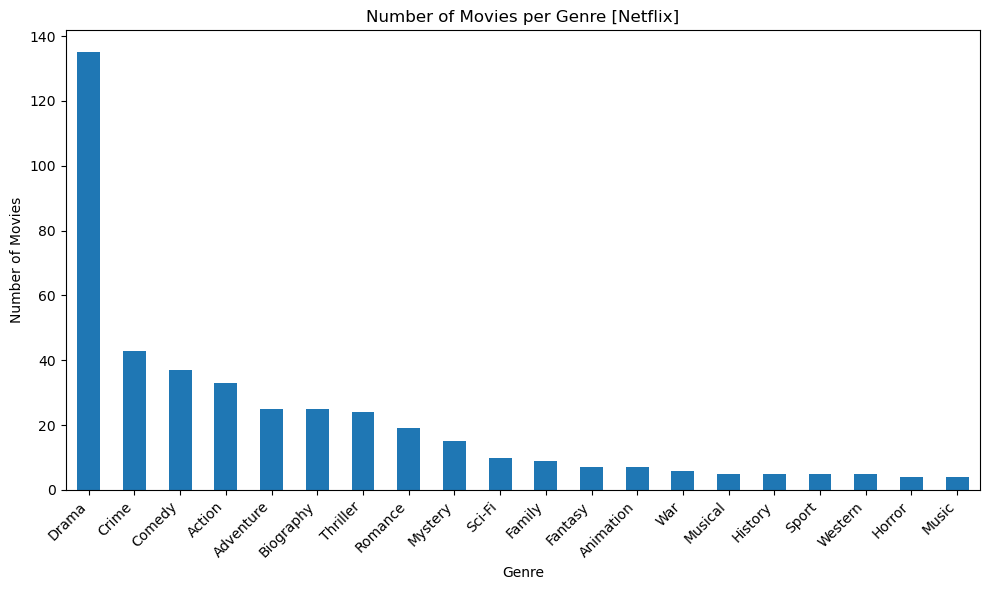

In [31]:
# Display relationship between Movie genre and number of movies [Netflix & IMDB]

# Split the 'Genre' column into lists, stack them into a single Series, and then count occurrences
netflix_movies_genre_counts = netflix_imdb_df['Genre'].str.split(', ').explode().value_counts()
print(netflix_movies_genre_counts)

# Plotting the counts as above
plt.figure(figsize=(10, 6))
netflix_movies_genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre [Netflix]')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


In [18]:
# Combined the Prime Video and IMDB datasets on the Movie title columns (Uzair's Code)
amazon_prime_imdb_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_combined_prime_imdb.csv'
amazon_prime_imdb_df = pd.read_csv(amazon_prime_imdb_path)

Genre
Drama        48
Comedy       20
Crime        13
Romance      13
Biography     8
Thriller      8
Action        7
Mystery       7
Adventure     7
Horror        6
Fantasy       4
Music         3
Sci-Fi        3
Animation     2
Film-Noir     2
Western       2
Family        2
History       1
Musical       1
Sport         1
War           1
Name: count, dtype: int64


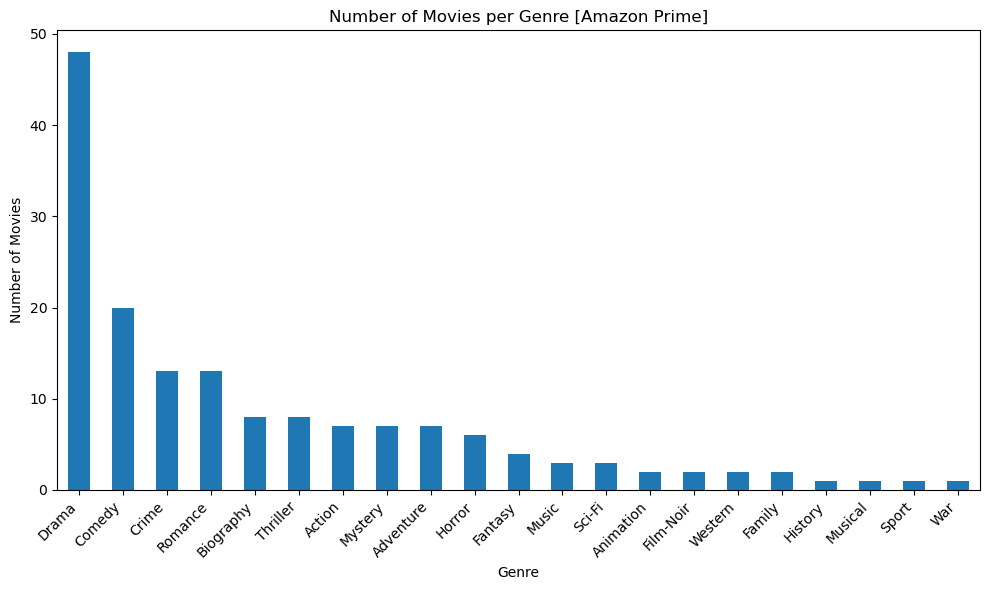

In [32]:
# Display relationship between Movie genre and number of movies [Amazon Prime & IMDB]

# Split the 'Genre' column into lists, stack them into a single Series, and then count occurrences
amazon_genre_counts = amazon_prime_imdb_df['Genre'].str.split(', ').explode().value_counts()
print(amazon_genre_counts)

# Plotting the counts as above
plt.figure(figsize=(10, 6))
amazon_genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre [Amazon Prime]')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


In [33]:
# Combined the Disney plus and IMDB datasets on the Movie title columns
disney_imdb_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_combined_disney_imdb.csv'
disney_imdb_df = pd.read_csv(disney_imdb_path)

Genre
Adventure    31
Animation    27
Comedy       22
Family       13
Drama        11
Biography     7
Fantasy       7
Action        6
History       2
Romance       1
Sci-Fi        1
Sport         1
Name: count, dtype: int64


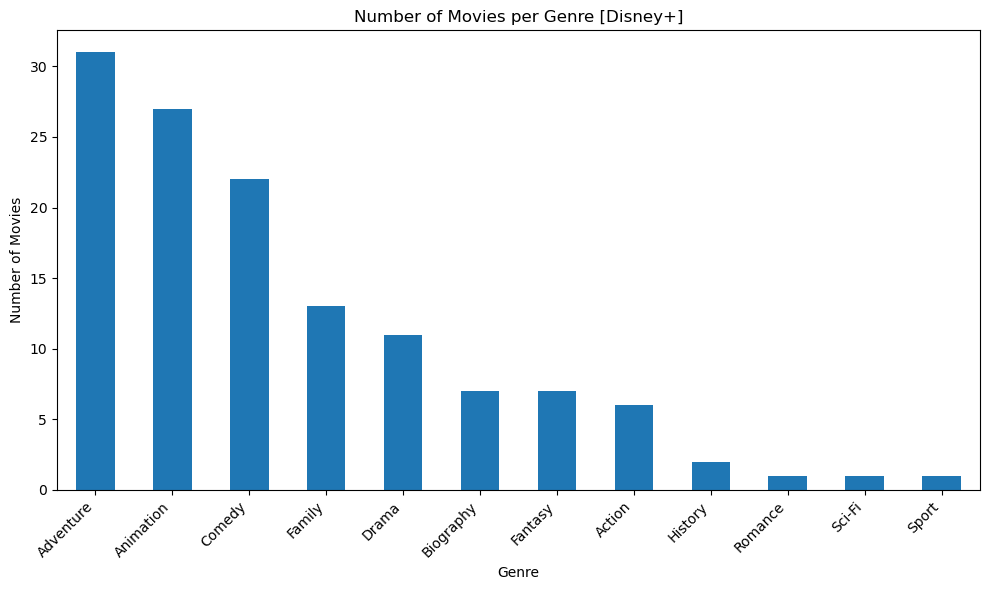

In [34]:
# Display relationship between Movie genre and number of movies [Disney plus & IMDB]

# Split the 'Genre' column into lists, stack them into a single Series, and then count occurrences
disney_genre_counts = disney_imdb_df['Genre'].str.split(', ').explode().value_counts()
print(disney_genre_counts)

# Plotting the counts as above
plt.figure(figsize=(10, 6))
disney_genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre [Disney+]')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


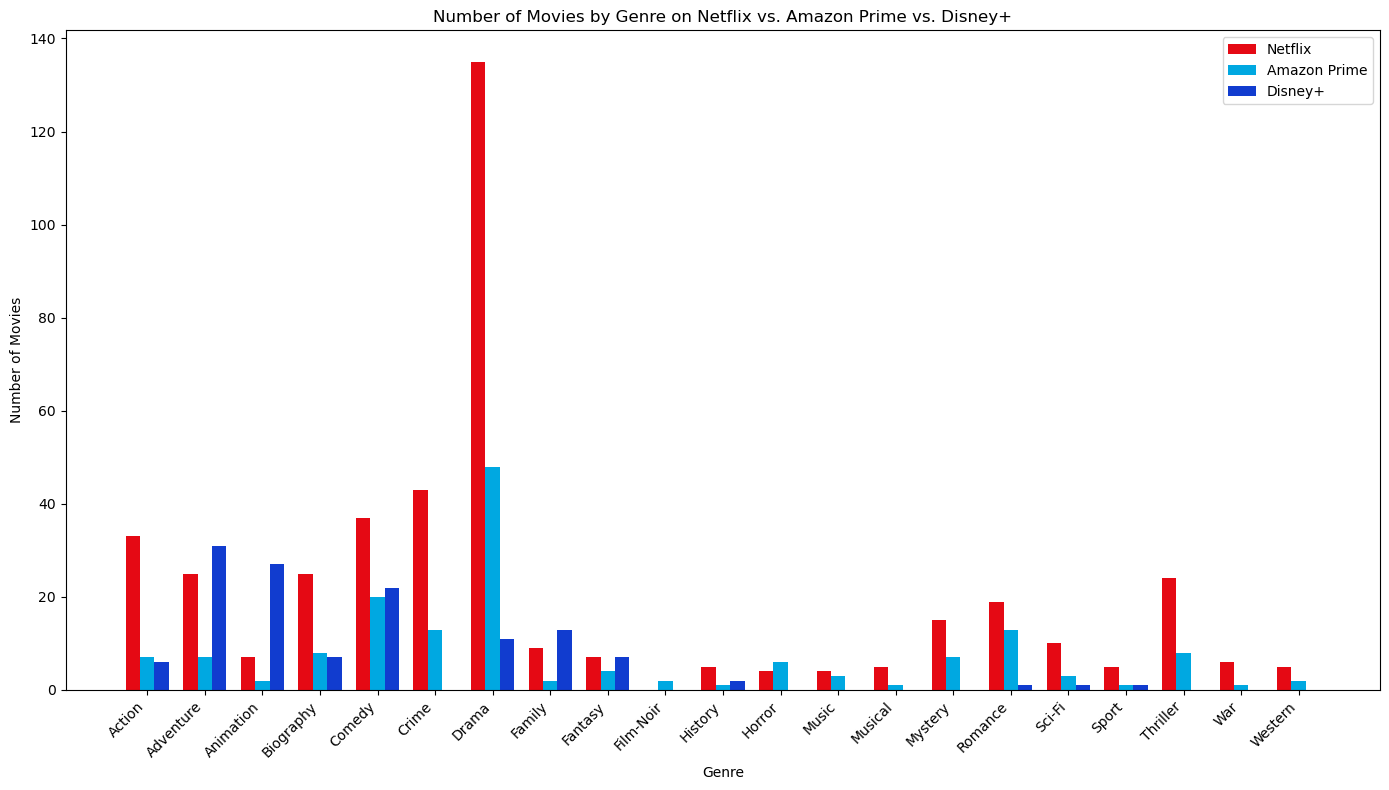

In [41]:
# Creating a new DataFrame for plotting
combined_genre_counts = pd.DataFrame({
    'Netflix': netflix_movies_genre_counts,
    'Amazon Prime': amazon_genre_counts,
    'Disney+': disney_genre_counts
}).fillna(0)  # Fill missing values with zeroes

# Ensure all genres are included and aligned
genres = combined_genre_counts.index

# Setting up the positions for the bars
ind = np.arange(len(genres))  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(ind - width, combined_genre_counts['Netflix'], width, label='Netflix', color='#E50914')
rects2 = ax.bar(ind, combined_genre_counts['Amazon Prime'], width, label='Amazon Prime', color='#00A8E1')
rects3 = ax.bar(ind + width, combined_genre_counts['Disney+'], width, label='Disney+', color='#113CCF')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Movies')
ax.set_title('Number of Movies by Genre on Netflix vs. Amazon Prime vs. Disney+')
ax.set_xticks(ind)
ax.set_xticklabels(genres, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

## Next steps:
- Plot revenue
- Plot movie duration
- Plot IMDB rating
- Plot PG Rating

### Entry Date: 25.02.2024

**Update**: We have decided to do the following:
- Not use the IMDB Dataset for now due to many movies and series missing in it.
- Split our datasets on TV Shows and Movies and clean the data
- Create a combined dataset with movies from all streaming platforms
- Create a combined dataset with series from all streaming platforms
- Research which chart types/plots are there and which types are more relevant for our data
- Recreate the Number of movies/series per genre plot using the new datasets
- Create further plots

**My to do's**:</br>
✅ create a raw netflix movies dataset and add the column 'Platform' and fill it with 'Netflix'</br>
✅ create a raw netflix series dataset and add the column 'Platform' and fill it with 'Netflix'</br>
✅ create a raw disney+ movies dataset and add the column 'Platform' and fill it with 'Disney+'</br>
✅ create a raw disney+ series dataset and add the column 'Platform' and fill it with 'Disney+'</br>
✅ create a raw prime video movies dataset and add the column 'Platform' and fill it with 'Prime Video'</br>
✅ create a raw prime video series dataset and add the column 'Platform' and fill it with 'Prime Video'</br>
...

## Choosing the right Plot/Chart type

Selecting the appropriate plot or chart type is crucial for effectively communicating the insights derived from datasets, especially when dealing with data from platforms like Netflix, Prime Video, and Disney+. The goal is to emphasize certain aspects of the data and present it in a way that is intuitive to the audience. 

A bar chart is a common choice for showing the number of shows per genre because it clearly compares frequencies across categories. However, there might be situations where alternative visualizations could offer deeper insights or present the data in a more engaging manner. Here are some alternatives you might consider:

### 1. Pie Chart
- **When to use**: Ideal for showing the proportion of each genre relative to the total. It visually represents part-to-whole relationships in a clear, circular format.
- **Limitations**: Can become difficult to interpret with too many genres due to limited space for labels and small slices.

### 2. Stacked Bar Chart
- **When to use**: Effective for comparing the number of shows per genre across different platforms in a single visualization.
- **Advantages**: Allows for easy comparison of genre distribution within each platform and against others.

### 3. Treemap
- **When to use**: Best for visualizing hierarchical data, such as genres and sub-genres, and showing part-to-whole relationships through nested rectangles.
- **Benefits**: Space-efficient, capable of displaying a large number of categories without becoming cluttered.

### 4. Dot Plot
- **When to use**: Suitable for comparing a smaller number of genres or when the differences between categories are relatively minor.
- **Strengths**: Simplicity and clarity, less cluttered than bar charts for smaller datasets, emphasizing minor differences effectively.

### 5. Heatmap
- **When to use**: Useful for showing the concentration of shows across genres and platforms through color intensity.
- **Purpose**: Offers a quick overview of content density, highlighting areas with the most shows.

### 6. Multi-Series Line Chart (Time Series Analysis)
- **When to use**: Ideal for tracking the growth or trends in the number of shows within genres over time.
- **Advantages**: Facilitates comparison of trends over time, including the growth or decline of specific genres across platforms.

#### Making the Right Choice

The decision on which visualization to use should be guided by:
- **Your Audience**: Choose the format that will be most intuitive for them to understand.
- **Your Data**: Consider the number of genres you're comparing and whether there's a hierarchical relationship among them.
- **Your Message**: Decide whether you're focusing on proportions, comparisons, trends, or distributions.

For instance, a **stacked bar chart** or **treemap** may offer more insight if the goal is to emphasize the dominance of certain genres or the content balance across platforms. Conversely, a **multi-series line chart** might be more appropriate for demonstrating genre growth trends over time or seasonal variations in show additions.

Each type of visualization has unique strengths and is suited to specific contexts. The key is to match the visualization method with the insights you aim to convey, ensuring your message is communicated effectively to your audience.

In [4]:
# Clean combined movies dataset
movies_clean_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/clean/clean_combined_movies.csv'
movies_clean_df = pd.read_csv(movies_clean_path)

# Clean combined series dataset
series_clean_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/clean/clean_combined_series.csv'
series_clean_df = pd.read_csv(series_clean_path)

In [13]:
print("\nCombined Movies column names:")
print(movies_clean_df.columns.tolist())


Combined Movies column names:
['title', 'country', 'release_year', 'rating', 'duration_min', 'genre', 'description', 'platform']


In [14]:
raw_combined_series_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/raw/raw_combined_series.csv'
raw_combined_series_df = pd.read_csv(raw_combined_series_path)

In [15]:
print("\nRaw Combined Series column names:")
print(raw_combined_series_df.columns.tolist())


Raw Combined Series column names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'Platform']


In [18]:
# List of columns I want to drop
columns_to_drop = ['show_id', 'type', 'director', 'cast', 'date_added']
raw_combined_series_df = raw_combined_series_df.drop(columns=columns_to_drop, axis=1)

In [20]:
# Changing duration to integer
raw_combined_series_df['duration'] = raw_combined_series_df['duration'].str.extract('(\d+)').astype(int)

In [23]:
# Rename the 'duration' column to 'duration_seasons'
raw_combined_series_df.rename(columns={'duration': 'duration_seasons'}, inplace=True)

In [27]:
# Rename the 'Platform' column to 'platform'
raw_combined_series_df.rename(columns={'Platform': 'platform'}, inplace=True)

In [28]:
raw_combined_series_df.head()

,title,country,release_year,rating,duration_seasons,listed_in,description,platform
0,Blood & Water,South Africa,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
1,Ganglands,NaN,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
2,Jailbirds New Orleans,NaN,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
3,Kota Factory,India,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
4,Midnight Mass,NaN,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Netflix


In [29]:
# raw_combined_series_df.to_csv('/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/clean/clean_combined_series.csv', index=False)

### Entry Date: 29.02.2024

## Task 1: Create a Plot of Genre & Number of Movies on Combined Dataset

In [5]:
print("\nClean Combined Movies dataset column names:")
print(movies_clean_df.columns.tolist())


Clean Combined Movies dataset column names:
['title', 'country', 'release_year', 'rating', 'duration_min', 'genre', 'description', 'platform']


In [6]:
print("\nClean Combined TV Series dataset column names:")
print(series_clean_df.columns.tolist())


Clean Combined TV Series dataset column names:
['title', 'country', 'release_year', 'rating', 'duration_seasons', 'listed_in', 'description', 'platform']


In [7]:
# Separate DataFrames by platform and content type
netflix_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Netflix']
prime_video_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Prime Video']
disney_plus_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Disney+']

netflix_series_df = series_clean_df[series_clean_df['platform'] == 'Netflix']
prime_video_series_df = series_clean_df[series_clean_df['platform'] == 'Prime Video']
disney_plus_series_df = series_clean_df[series_clean_df['platform'] == 'Disney+']

In [6]:
# Rename the 'listed_in' column in clean_combined_series dataset to 'genre'
series_clean_df.rename(columns={'listed_in': 'genre'}, inplace=True)
series_clean_df.to_csv('/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/clean/clean_combined_series.csv', index=False)

In [21]:
# Explode the movie 'genre' column for each platform
netflix_movies_df = netflix_movies_df.assign(genre=netflix_movies_df['genre'].str.split(', ')).explode('genre')
prime_video_movies_df = prime_video_movies_df.assign(genre=prime_video_movies_df['genre'].str.split(', ')).explode('genre')
disney_plus_movies_df = disney_plus_movies_df.assign(genre=disney_plus_movies_df['genre'].str.split(', ')).explode('genre')

# Explode the series 'genre' column for each platform
netflix_series_df = netflix_series_df.assign(genre=netflix_series_df['genre'].str.split(', ')).explode('genre')
prime_video_series_df = prime_video_series_df.assign(genre=prime_video_series_df['genre'].str.split(', ')).explode('genre')
disney_plus_series_df = disney_plus_series_df.assign(genre=disney_plus_series_df['genre'].str.split(', ')).explode('genre')

# Count the number of movies by genre
netflix_movies_genre_counts = netflix_movies_df['genre'].value_counts()
prime_video_movies_genre_counts = prime_video_movies_df['genre'].value_counts()
disney_plus_movies_genre_counts = disney_plus_movies_df['genre'].value_counts()

# Count the number of series by genre
netflix_series_genre_counts = netflix_series_df['genre'].value_counts()
prime_video_series_genre_counts = prime_video_series_df['genre'].value_counts()
disney_plus_series_genre_counts = disney_plus_series_df['genre'].value_counts()

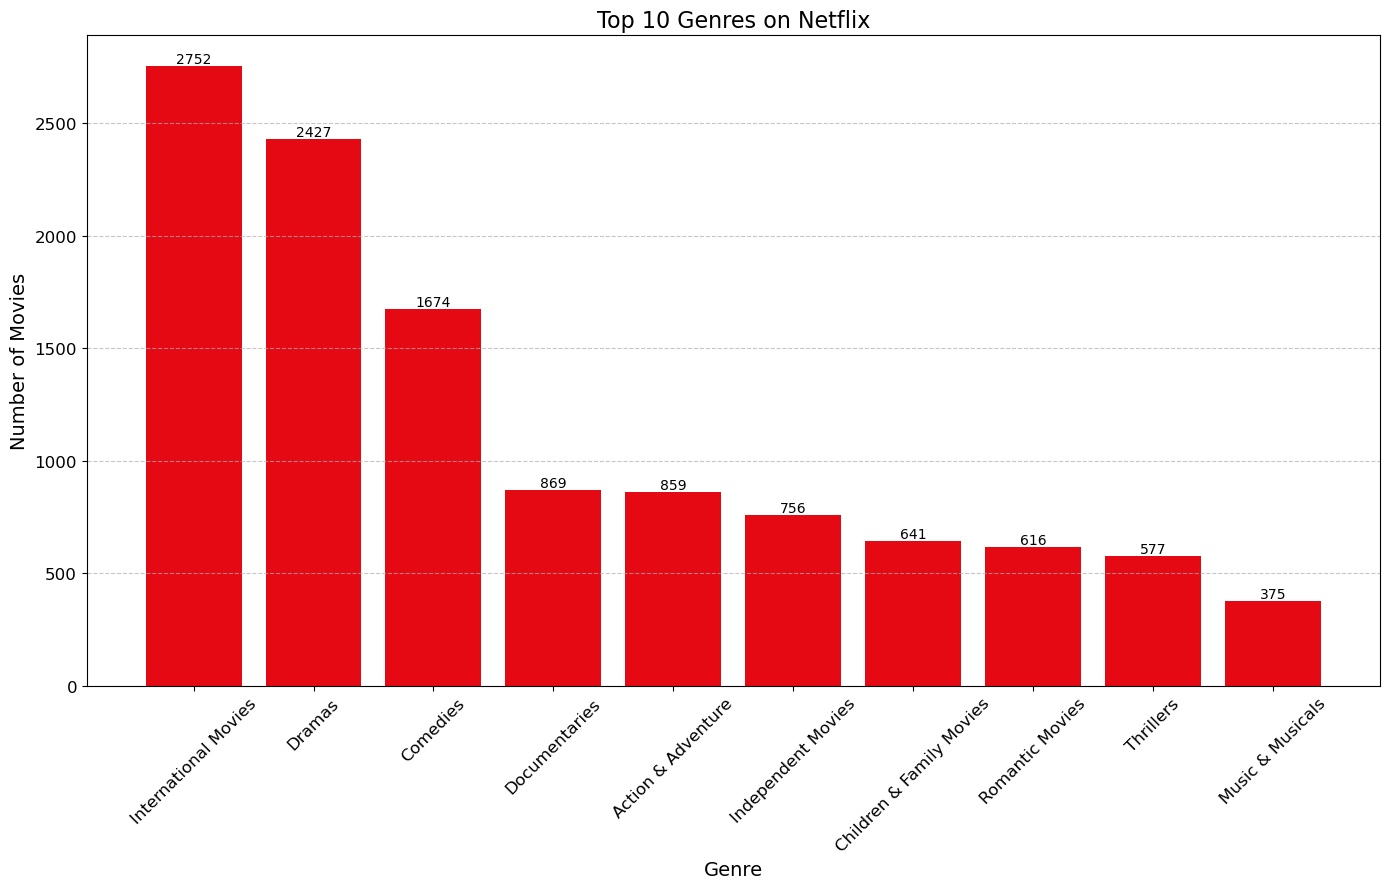

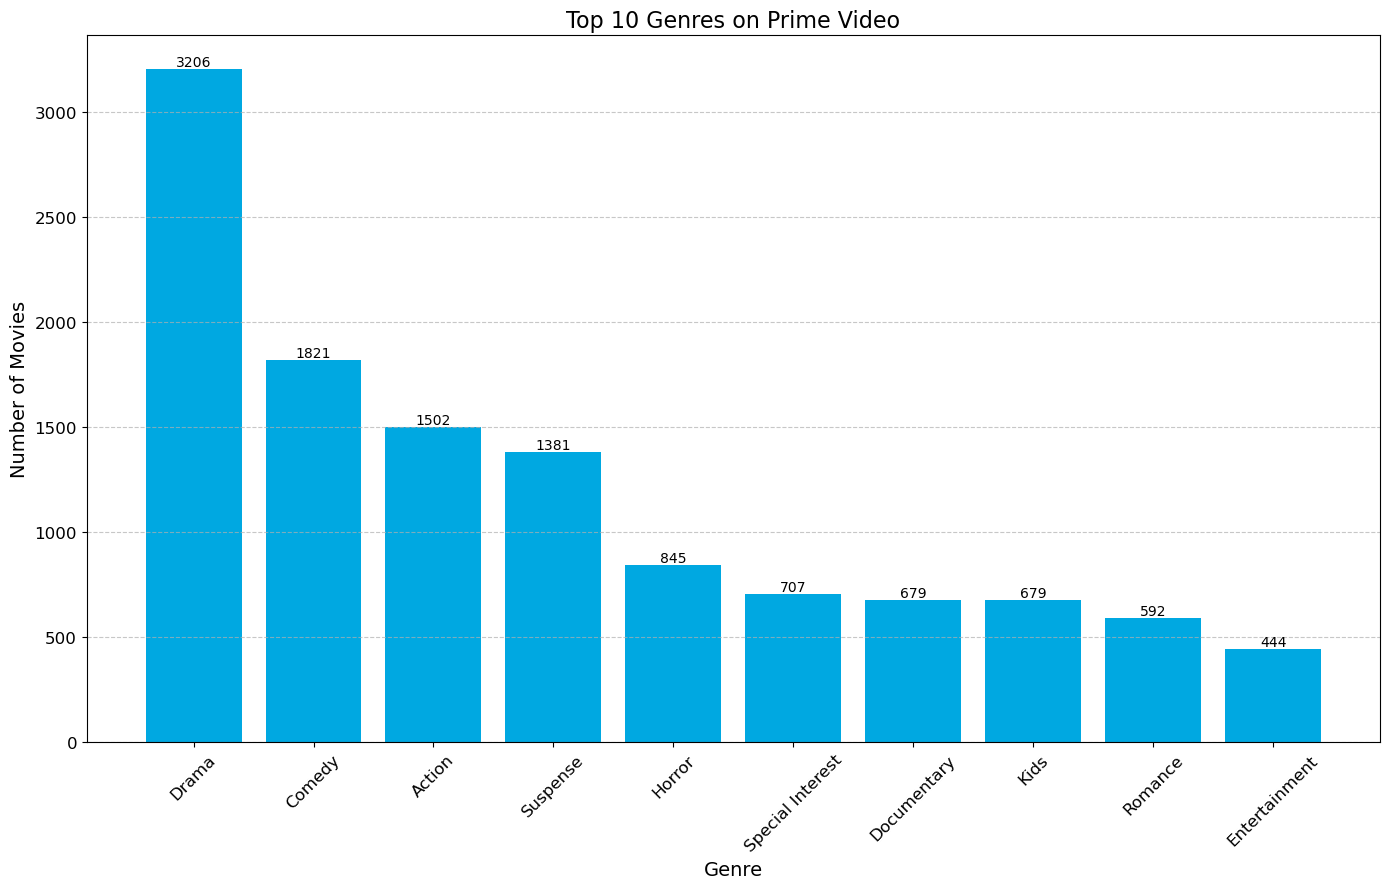

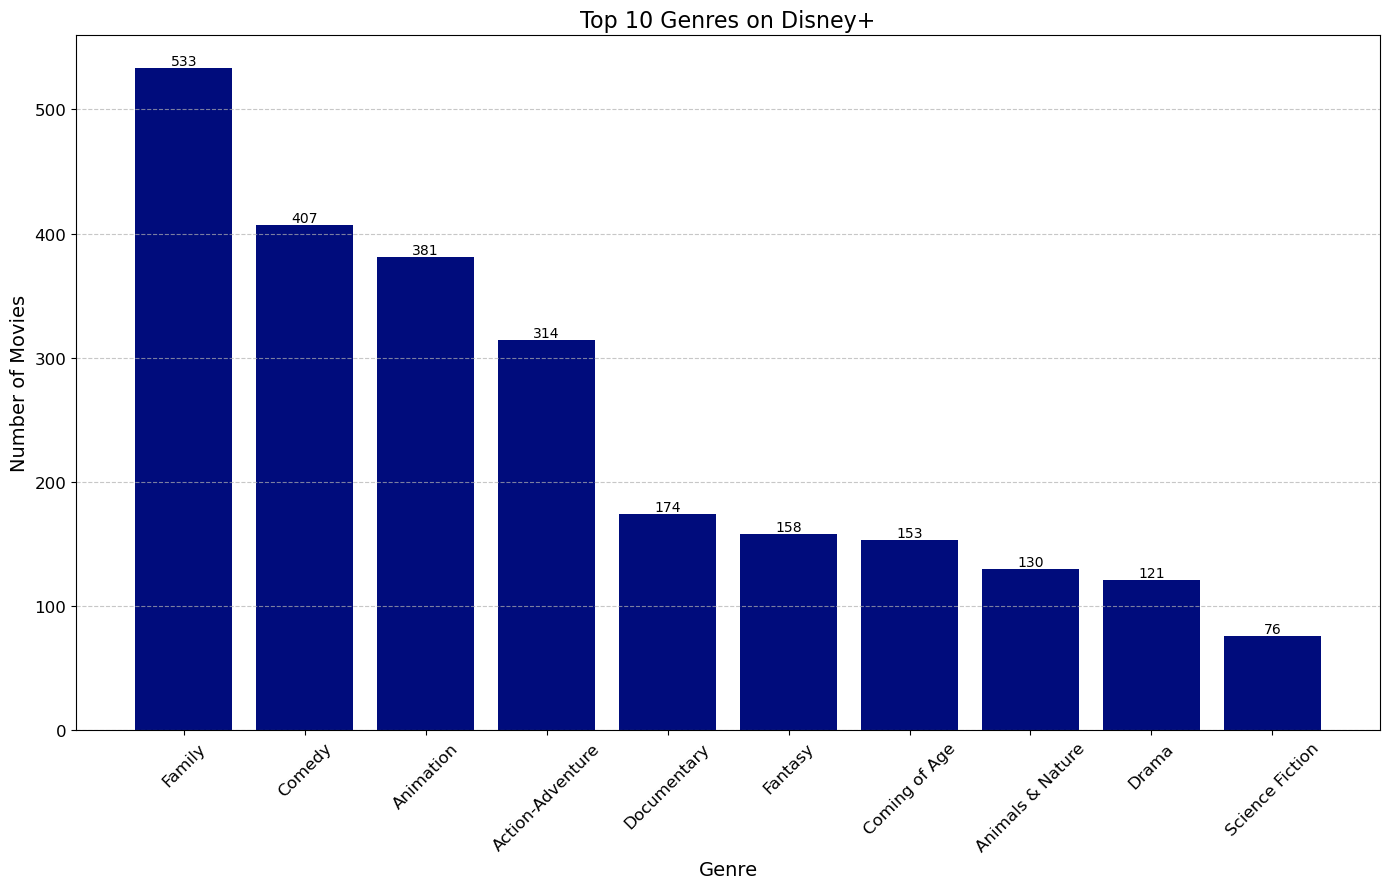

In [22]:
def plot_top_10_genres_movie_count(genre_counts, platform_name, color):
    plt.figure(figsize=(14, 9))
    # Select only the top 10 genres
    top_10_genres = genre_counts.head(10)
    bars = plt.bar(top_10_genres.index, top_10_genres.values, color=color)
    
    # Add numbers on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=10)

    plt.title(f'Top 10 Genres on {platform_name}', fontsize=16)
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Number of Movies', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    
    plt.tight_layout()
    plt.show()

# Colors for each platform (you can adjust these if you've found better matches)
netflix_color = '#E50914'  # Deep red for Netflix
prime_video_color = '#00A8E1'  # Dark blue for Prime Video
disney_plus_color = '#000c7c'  # Light blue for Disney+

# Generate enhanced plots for each platform
plot_top_10_genres_movie_count(netflix_movies_genre_counts, 'Netflix', netflix_color)
plot_top_10_genres_movie_count(prime_video_movies_genre_counts, 'Prime Video', prime_video_color)
plot_top_10_genres_movie_count(disney_plus_movies_genre_counts, 'Disney+', disney_plus_color)


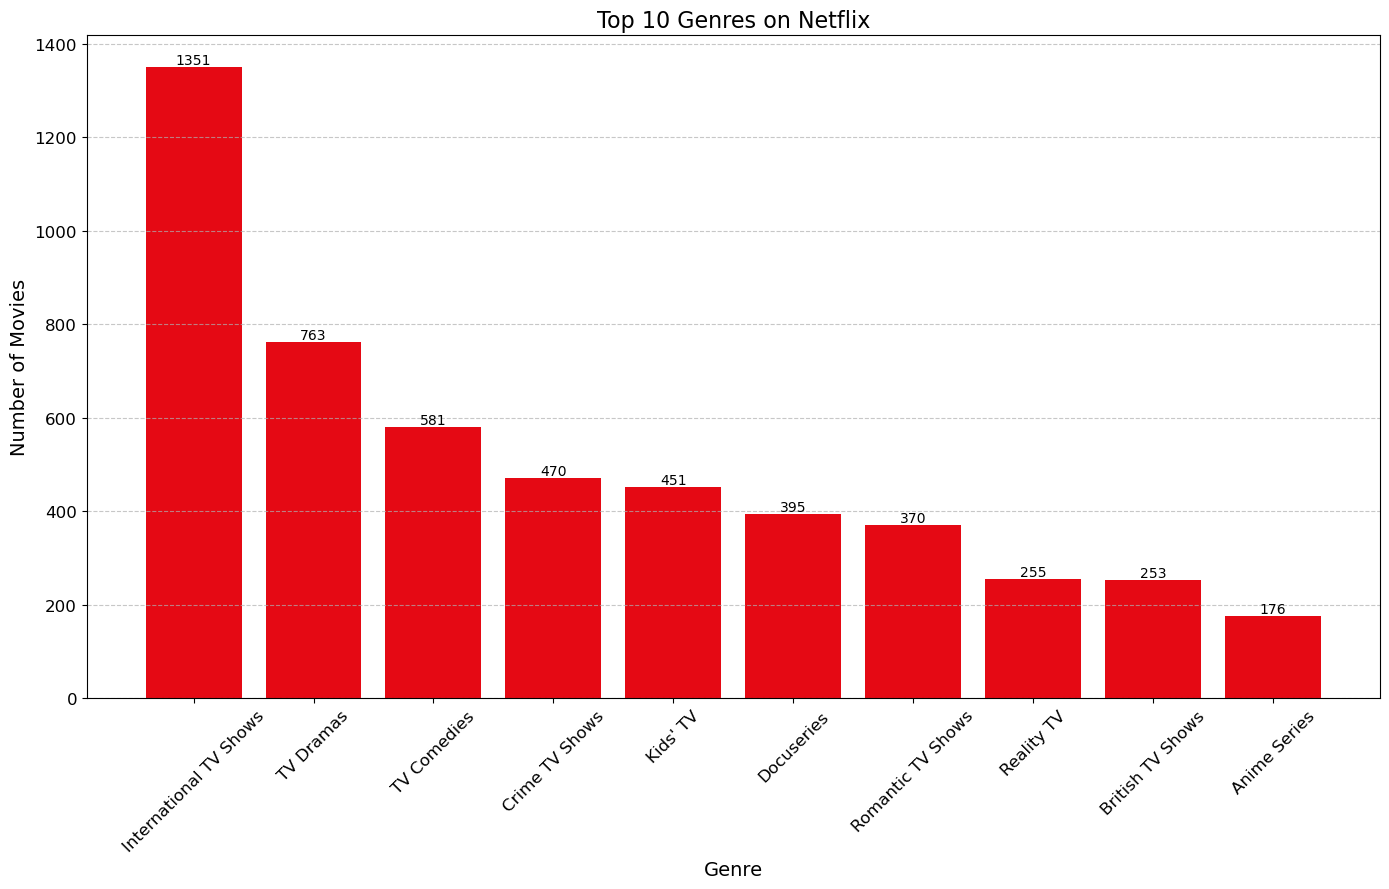

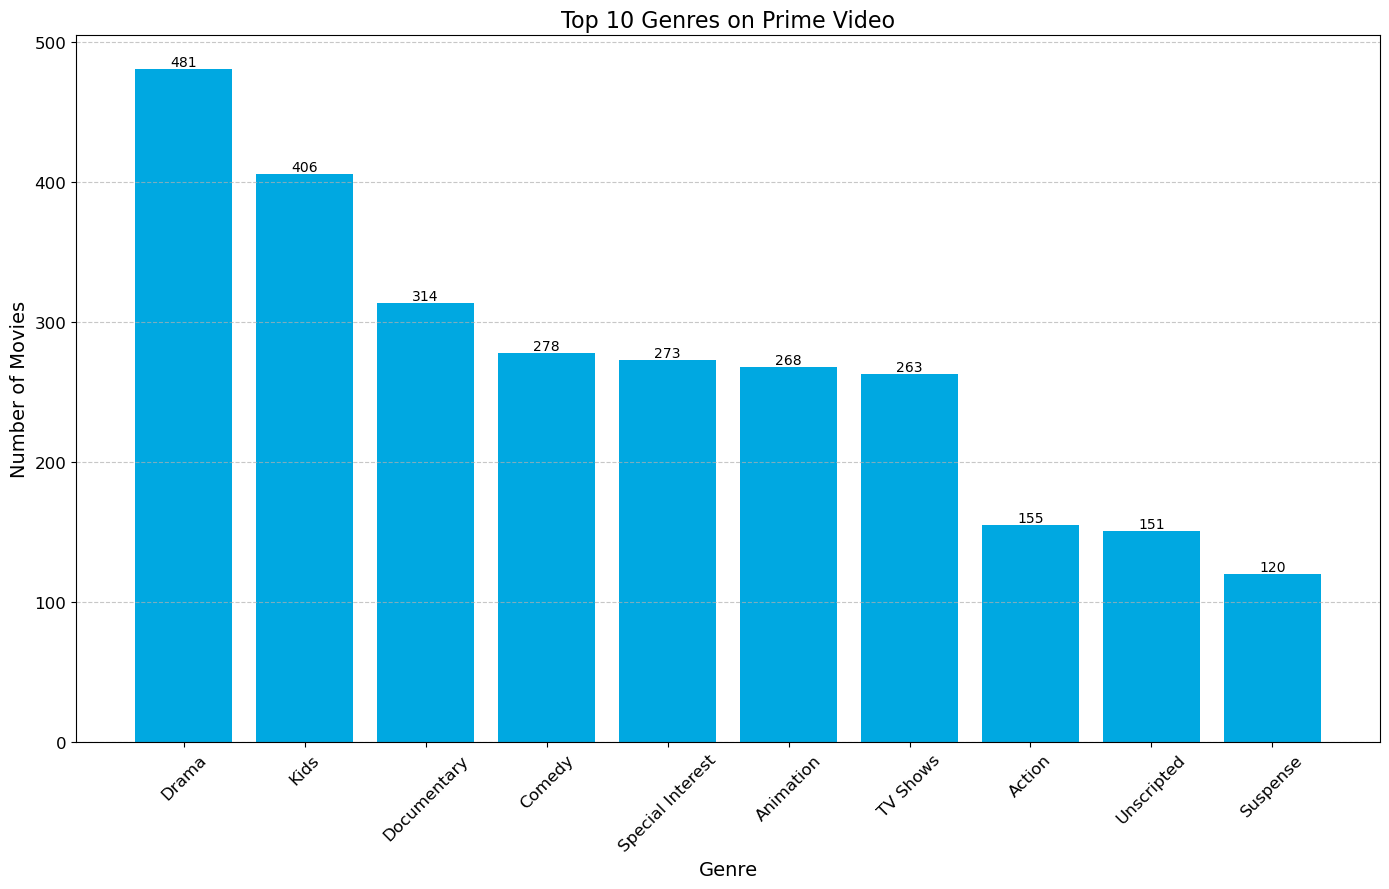

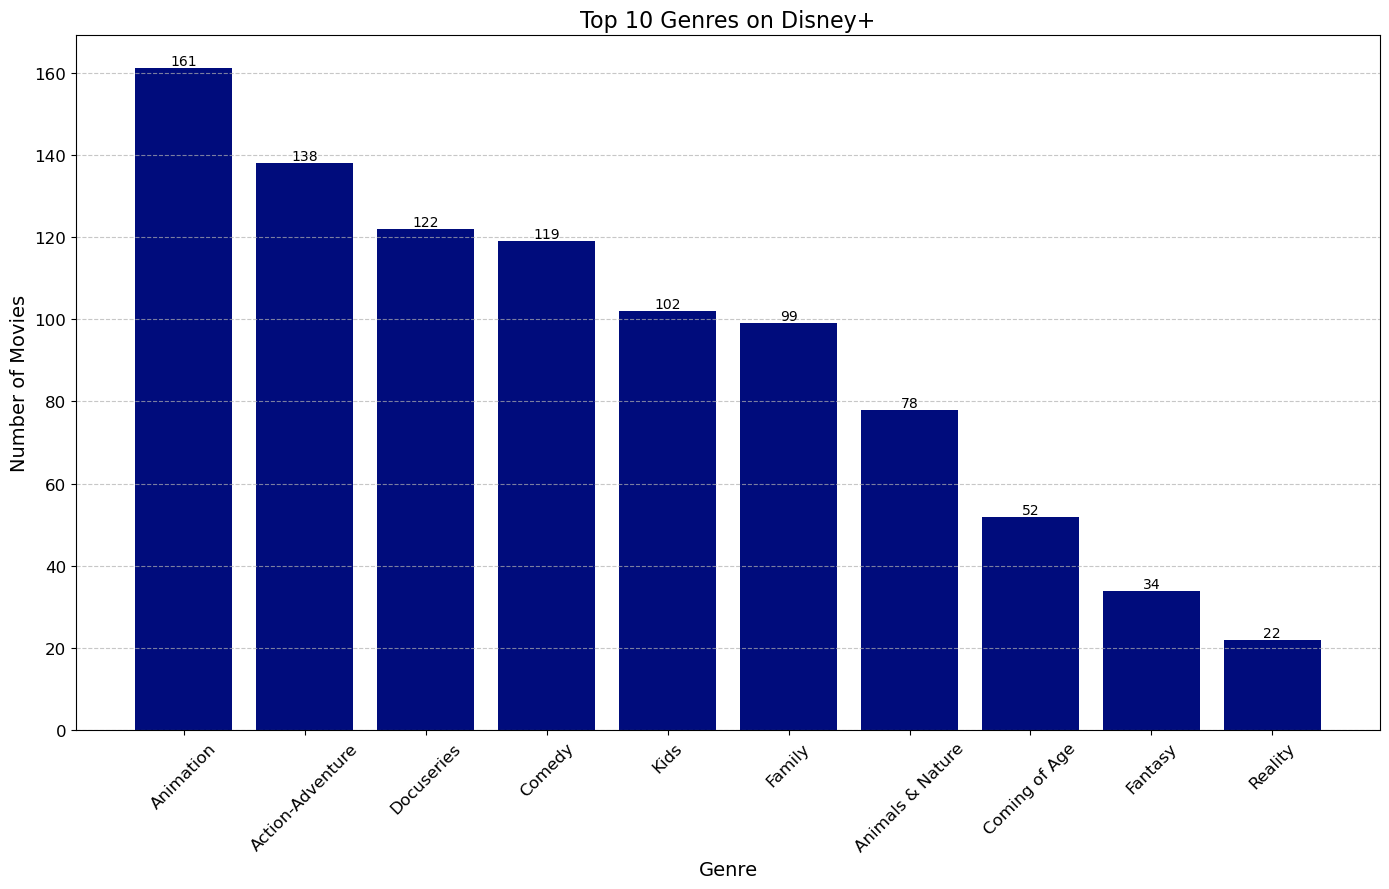

In [23]:
def plot_top_10_genres_series_count(genre_counts, platform_name, color):
    plt.figure(figsize=(14, 9))
    # Select only the top 10 genres
    top_10_genres = genre_counts.head(10)
    bars = plt.bar(top_10_genres.index, top_10_genres.values, color=color)
    
    # Add numbers on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=10)

    plt.title(f'Top 10 Genres on {platform_name}', fontsize=16)
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Number of Movies', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    
    plt.tight_layout()
    plt.show()

# Colors for each platform (you can adjust these if you've found better matches)
netflix_color = '#E50914'  # Deep red for Netflix
prime_video_color = '#00A8E1'  # Dark blue for Prime Video
disney_plus_color = '#000c7c'  # Light blue for Disney+

# Generate enhanced plots for each platform
plot_top_10_genres_series_count(netflix_series_genre_counts, 'Netflix', netflix_color)
plot_top_10_genres_series_count(prime_video_series_genre_counts, 'Prime Video', prime_video_color)
plot_top_10_genres_series_count(disney_plus_series_genre_counts, 'Disney+', disney_plus_color)


In [24]:
# Display unique genres for Netflix
print("Unique genres in Netflix movies:")
print(netflix_movies_df['genre'].unique())

# Display unique genres for Prime Video
print("\nUnique genres in Prime Video movies:")
print(prime_video_movies_df['genre'].unique())

# Display unique genres for Disney+
print("\nUnique genres in Disney+ movies:")
print(disney_plus_movies_df['genre'].unique())


Unique genres in Netflix movies:
['Documentaries' 'Children & Family Movies' 'Dramas' 'Independent Movies'
 'International Movies' 'Comedies' 'Thrillers' 'Romantic Movies'
 'Music & Musicals' 'Horror Movies' 'Sci-Fi & Fantasy'
 'Action & Adventure' 'Classic Movies' 'Anime Features' 'Sports Movies'
 'Cult Movies' 'Faith & Spirituality' 'LGBTQ Movies' 'Stand-Up Comedy'
 'Movies']

Unique genres in Prime Video movies:
['Comedy' 'Drama' 'International' 'Action' 'Suspense' 'Documentary'
 'Fantasy' 'Kids' 'Special Interest' 'Science Fiction' 'Adventure'
 'Horror' 'Sports' 'Arts' 'Entertainment' 'and Culture'
 'Music Videos and Concerts' 'Fitness' 'Faith and Spirituality'
 'Military and War' 'Western' 'LGBTQ' 'Animation' 'Young Adult Audience'
 'Arthouse' 'Anime' 'Romance' 'Talk Show and Variety' 'Historical'
 'Unscripted']

Unique genres in Disney+ movies:
['Animation' 'Family' 'Comedy' 'Musical' 'Biographical' 'Documentary'
 'Music' 'Animals & Nature' 'Fantasy' 'Drama' 'Action-Adventure'
 '

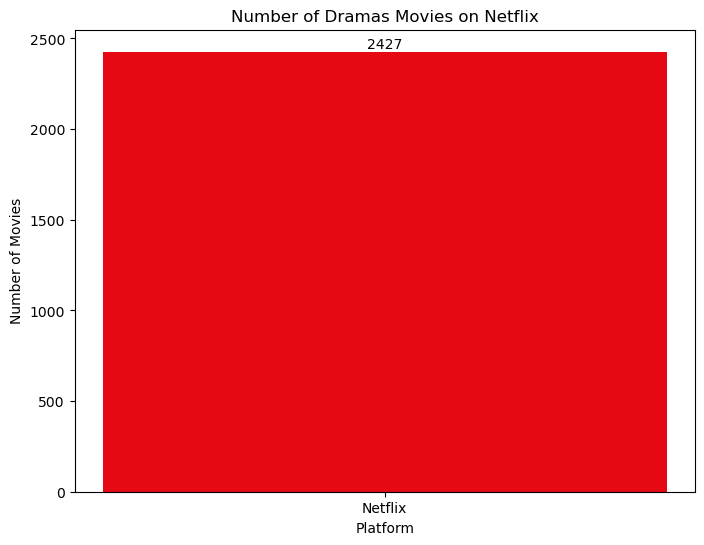

In [29]:
# Function to plot the number of movies in a genre for a specific platform
def plot_genre_count_for_platform(platform, genre, color):
    # Select the appropriate dataframe based on the platform
    if platform == "Netflix":
        df = netflix_movies_df
    elif platform == "Prime Video":
        df = prime_video_movies_df
    elif platform == "Disney+":
        df = disney_plus_movies_df
    else:
        print("I do not have information about this platform.")
        return
    
    genre_count = df[df['genre'] == genre]['genre'].count()
    
    # Create the plot if genre count is greater than 0
    if genre_count > 0:
        plt.figure(figsize=(8, 6))
        bar = plt.bar(platform, genre_count, color=color)
        plt.title(f'Number of {genre} Movies on {platform}')
        plt.xlabel('Platform')
        plt.ylabel('Number of Movies')
        plt.xticks([platform])  # Show only the selected platform on the x-axis

        # Add a text label above the bar
        plt.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height(), f'{int(bar[0].get_height())}', 
                 ha='center', va='bottom')

        plt.show()
    else:
        print(f"No movies found in {genre} genre on {platform}.")

# User inputs
user_genre = input("Enter a genre name: ").strip()
user_platform = input("Which streaming platform do you want to check (Netflix, Prime Video, Disney+)? ").strip()

# Validate genre
all_genres = set(netflix_movies_df['genre']).union(set(prime_video_movies_df['genre']), set(disney_plus_movies_df['genre']))
if user_genre not in all_genres:
    print("I do not have information about this genre.")
else:
    # Colors for each platform
    colors = {'Netflix': '#E50914', 'Prime Video': '#00A8E1', 'Disney+': '#000c7c'}
    # Validate platform and plot if valid
    if user_platform in colors:
        plot_genre_count_for_platform(user_platform, user_genre, colors[user_platform])
    else:
        print("I do not have information about this platform.")
